# Project 3: Investigating TMDB Data Set
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb is a crowd-sourced movie information database used by many film-related consoles, sites and apps, such as XBMC, MythTV and Plex. Dozens of media managers, mobile apps and social sites make use of its API. 

It contains information related to films including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings. The data that are provided here includes some of the information that is stored in the original database.


In this analysis I'll try to answer 4 main questions: 
- What is the top 5 movies which earned the most?
- Are movie's high revenue related to it's budget?
- What are the general movies trends across the years?
- Which genres are most popular across the years? 

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline 

#read csv data
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling
### General Properties

First we'll explore the data to see it's structure.

In [2]:
#show 5 rows from the head
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#get data diminsion
df.shape

(10866, 21)

In [4]:
#get data's data type and count of non nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

So as we can see, we have 21 column x 10866 rows. The imdb id, cast, homepage link, directors, taglines, keywords, overview, genres and production companies have missing values. Finally the release date is a string where it should be in a date format.

## Data Cleaning

### Step 1: Removing Unnecessary Columns
By looking into the questions we're aiming to answer, we relise that we are only interseted in the popularity, budget, revenue, original_title, runtime, genres and release_year, so we're going to drop the rest.

In [5]:
#removing columns
df.drop(['revenue_adj','budget_adj','imdb_id','id',
         'imdb_id','cast', 'homepage', 'director','release_date', 
         'tagline', 'keywords', 'overview','production_companies',
         'vote_count','vote_average'],
          axis = 1 ,inplace = True)

In [6]:
#checking if columns removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 594.3+ KB


### Step 2: Remove Duplicates
As a basic cleaning step, we should check for duplicates and remove them if they exist.

In [7]:
#getting total of duplicated rows
df.duplicated().sum()

1

In [8]:
#droping duplicates
df.drop_duplicates(inplace = True)

In [9]:
#checking if duplicates are removed
df.duplicated().sum()

0

### Step 3: Remove Null Values


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 679.1+ KB


*As we can see, columns with numeric types doesn't have any null values, we only have nulls in genres, which wouldn't affect the correctness of the analysis.*

<a id='eda'></a>

## Exploratory Data Analysis

### Exploring The Destributions
First i'll try to get a general look on the varibales i'll be working with by plotting their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24144828>,
      dtype=object)

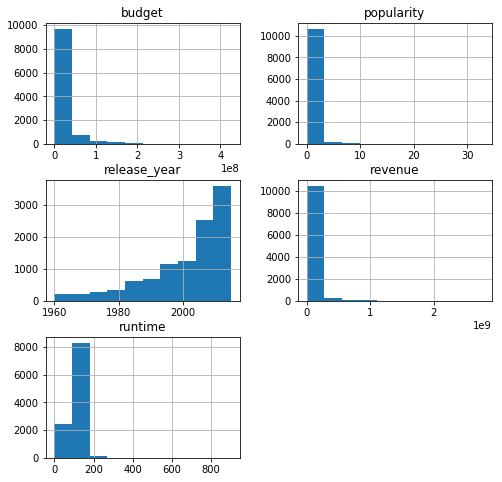

In [11]:
df.hist(figsize = (8,8))

We can notice that all the data we have are skewed, we don't have any clear symmetric distributions among our variables. So lets move on and dig more in the data to try to answer our questions. But first, i'll define a method that sets plots attributes to reduce the amount of code lines and make plotting more convenient.

In [12]:
def plot_attributes(label = '', xlabel = '', ylabel = '', figsize = [10,6]):
    """
    This function sets givin plots attributes, 
    all parameters are optional in order to make it flexable
    """
    plt.title(label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.rcParams['figure.figsize'] = figsize

### Research Question 1: Top 5 Movies Which Earned The Most

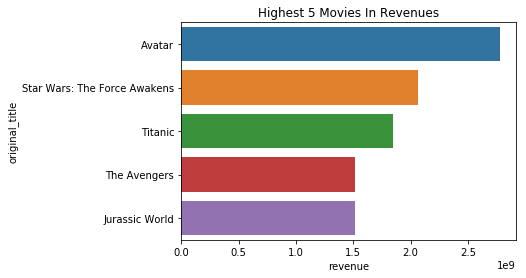

In [13]:
#arrange data by revenue in descending order, get top 5
df_v2 = df.sort_values(by = 'revenue', ascending = False)[:5]

#plot top 5 movies
plot_attributes(label = 'Highest 5 Movies In Revenues')
sns.barplot(x='revenue', y='original_title', data= df_v2)

*As we can see in the bar chart, highest revenue is earned by the movie Avatar since it earned more than 2,500,000,000 USD, Star Wars: The Force Awakens comes next, followed by Titanic, then The Avengers and finally Jurassic World comes last of the 5 by a bit more than 1,500,000,000 USD.*

### Research Question 2: Are Movie's High Revenue Related To High Budget?

In [14]:
#grouping data by year and aggregating it with mean
df_avg = df.groupby('release_year').mean()

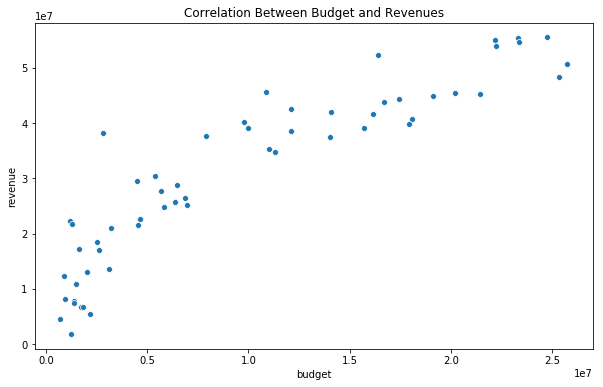

In [15]:
#plotting the correlation between budget and revenue
plot_attributes(label = 'Correlation Between Budget and Revenues')
sns.scatterplot(df_avg['budget'],df_avg['revenue'])

*By looking in the scatter plot, we can clearly see that there is a positive correlation between the budget and the revenue, so yes, there is a relation and it's positive.*

### Research Question 3:  What Is The Movie's Charectaristics Trends Over The Years?

#### How Does The Number Of Movies Changed Across The Years?

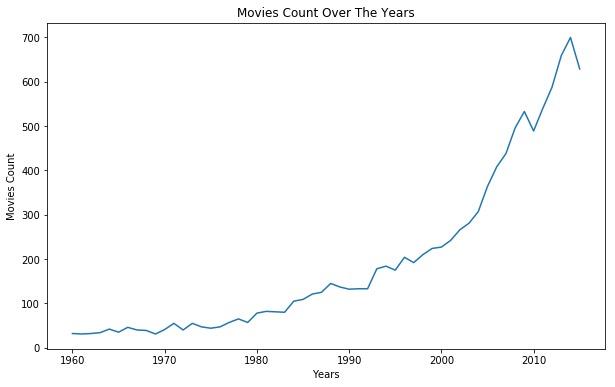

In [16]:
#grouping data by year and aggregating it using size
movies_count_by_year = df.groupby('release_year').size()

#plotting movies counts over the years
plot_attributes(label = 'Movies Count Over The Years', xlabel = 'Years', ylabel = 'Movies Count')
sns.lineplot(data = movies_count_by_year )

*We can see a clear increase in the number of movies across the years, with a slight drop near 2012, started from less than 50 movies in 1960 until it reached around 700 in 2012.*

#### How Does The Budget Changed Across The Years?

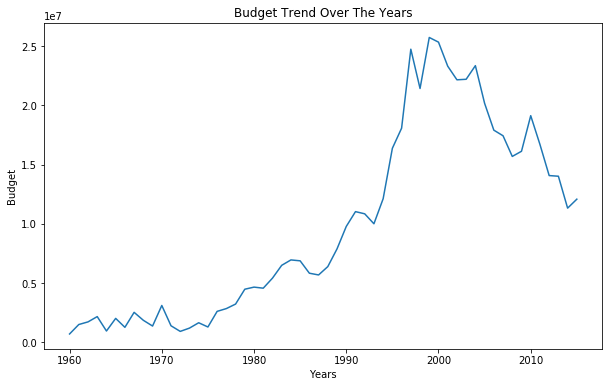

In [17]:
#plotting budget trend
plot_attributes(label = 'Budget Trend Over The Years', xlabel = 'Years', ylabel = 'Budget')
sns.lineplot(data = df_avg['budget'])

*The budget trend shows that movie's budget started low in 1960 and kept increasing with slight drops until 2000, and then suddenly started to decrease. We're speaking from around  1,000,000 USD in 1960, reaching it's peak in 2002 by more than 25,000,000 USD, then dropping till around 12,000,000 USD.*

#### How Does The Runtime Changed Across The Years?

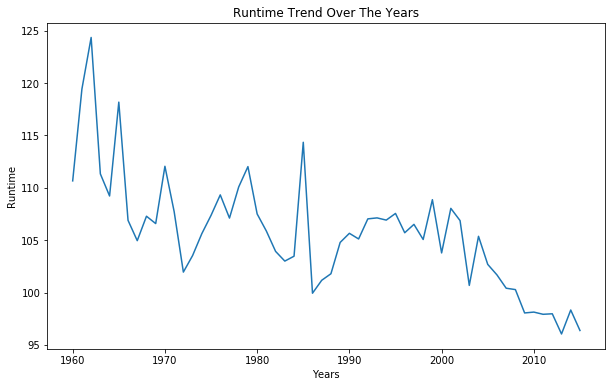

In [18]:
#plotting runtime trend
plot_attributes(label = 'Runtime Trend Over The Years', xlabel = 'Years', ylabel = 'Runtime')
sns.lineplot(data = df_avg['runtime'])

*We can see that the trend doesn't seem to be stable, but generally has decreased from around 110 minutes in 1960 to around 95 minutes in 2016.*

### Research Question 4: Which Genres Are Most Popular Across The Years?

In [19]:
#new df of the columns of interest
df_v3 = df[['release_year','genres']]

In [20]:
#split genres
df_v4 = df_v3['genres'].str.split('|', expand=True)

In [21]:
#merge genres into a single column
df_v4 = df_v4.merge(df_v3, left_index = True, right_index = True)

In [22]:
#drop old genre column
df_v4 = df_v4.drop(['genres'], axis = 1)

In [23]:
#identify genres by release year
df_v4 = df_v4.melt(id_vars = ['release_year'], value_name = "genres")

In [24]:
#drop nulls and innecessary columns
df_v4 = df_v4.drop("variable", axis = 1).dropna()

In [25]:
#group df by release year
grouped_by_year = df_v4.groupby(by = 'release_year')

In [26]:
#get genres popularities in each year
genres_popularity = grouped_by_year['genres'].value_counts()

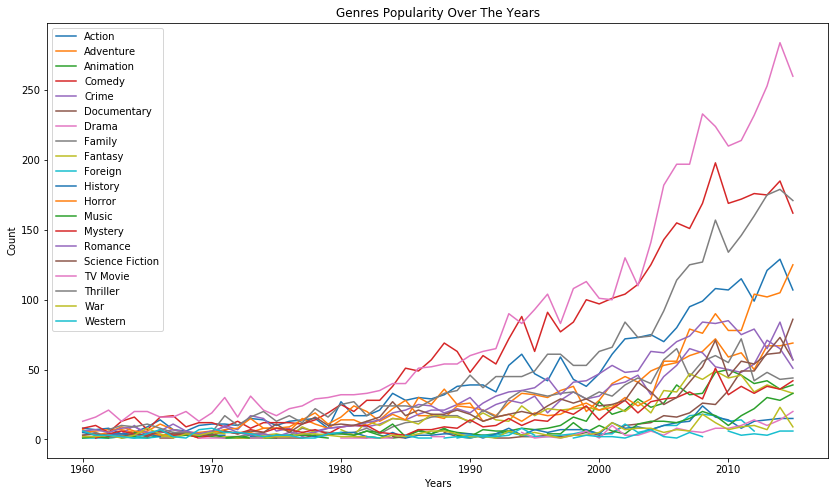

In [28]:
#plot genres popularties across the years
genres_popularity.unstack().plot();
plot_attributes(label = 'Genres Popularity Over The Years', xlabel = 'Years', ylabel = 'Count', figsize = [14,8])
plt.legend(loc = 'upper left')


*As we can see, most genres started at the same level except for drama, started a bit highr, through out the years all genres popularities increasd but in deiffrent levels. Drama is the dominant genre among the others, while we can say that comedy and thriller beside the drama are the most popular genres in the century.*

<a id='conclusions'></a>
## Conclusions
After I've analysed the data I conclude the following:
- Avatar, Star Wars and Titanic got the highest revenues among all other movies in the set.
- High budget correlate to high revenues positivly.
- Number of movies have increased from less than 100 to 700 through out the years.
- Movie's budget have been incresing through out the years until 2000 where it suddenly droped from its peak, thats from 25.000.000 USD to 12.000.000 USD.
- Runtime of movies haven't been stable across the years, but it generally decreased from 100 minutes in 1960 to 95 minutes in 2015.
- Drama is the dominant genre across the years.
<br><br>*Important Note: Conclusions are based on correlations, not on causation.*



**LIMITATIONS**
The data provided for this analysis didn't contain the currency for the budget and the revenues, so I have assumed it to be USD.
